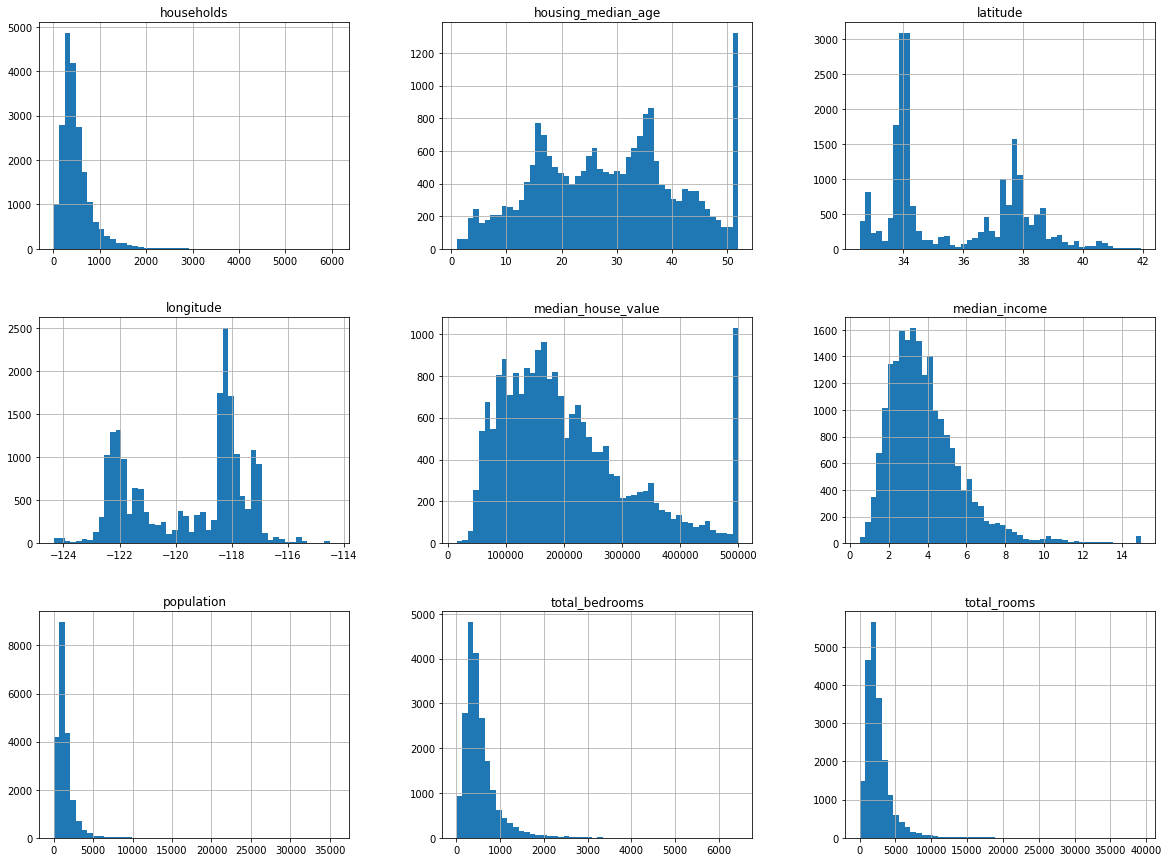

In [14]:
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from six.moves import urllib
%matplotlib inline

DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH='datasets/housing'
HOUSING_URL=DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

# download housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# load housing data in panda DataFrame
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

# create a test set
def split_train_set(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#fetch_housing_data()

housing = load_housing_data()
housing.head()

#data description
#housing.info()

#get distinct categories
#housing['ocean_proximity'].value_counts()

#get summary of numerical attributes
#housing.describe()

# Plot histogram of each numerical attribute
housing.hist(bins=50, figsize=(20,15))
plt.show()